# This file serve as making the whole process test runs with class

In [1]:
import sys
import os
import json 

# Get the parent directory of the notebook
project_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))


# Add the project directory to the Python path
sys.path.append(project_path)

# Now you can import the class
from classes.pdf_parser import JoradpFileParse
from classes.ocr_processor import OcrProcessor
from classes.image_builder import ImageBuilder
from classes.joradp_importer import JoradpImporter

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%%time
ocr = OcrProcessor()

Compiling detection model vikp/surya_det3 on device cpu with dtype torch.float32
Loaded detection model vikp/surya_det3 on device cpu with dtype torch.float32
CPU times: user 1.84 s, sys: 1.22 s, total: 3.06 s
Wall time: 30.1 s


In [3]:
parserImages = JoradpFileParse("./downloads/2015/F2015008.pdf")

In [4]:
%%time
parserImages.get_images_with_pymupdf()

CPU times: user 705 ms, sys: 232 ms, total: 937 ms
Wall time: 1 s


[<PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,
 <PIL.Image.Image image mode=RGB size=2480x3509>,


In [5]:
%%time
parserImages.get_images()

CPU times: user 269 ms, sys: 1.33 s, total: 1.6 s
Wall time: 4.23 s


[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=2480x3509>,
 <PIL.PpmI

In [11]:
%%time
parserImages.resize_image_to_fit_ocr()

CPU times: user 2.63 s, sys: 19.6 ms, total: 2.65 s
Wall time: 2.64 s


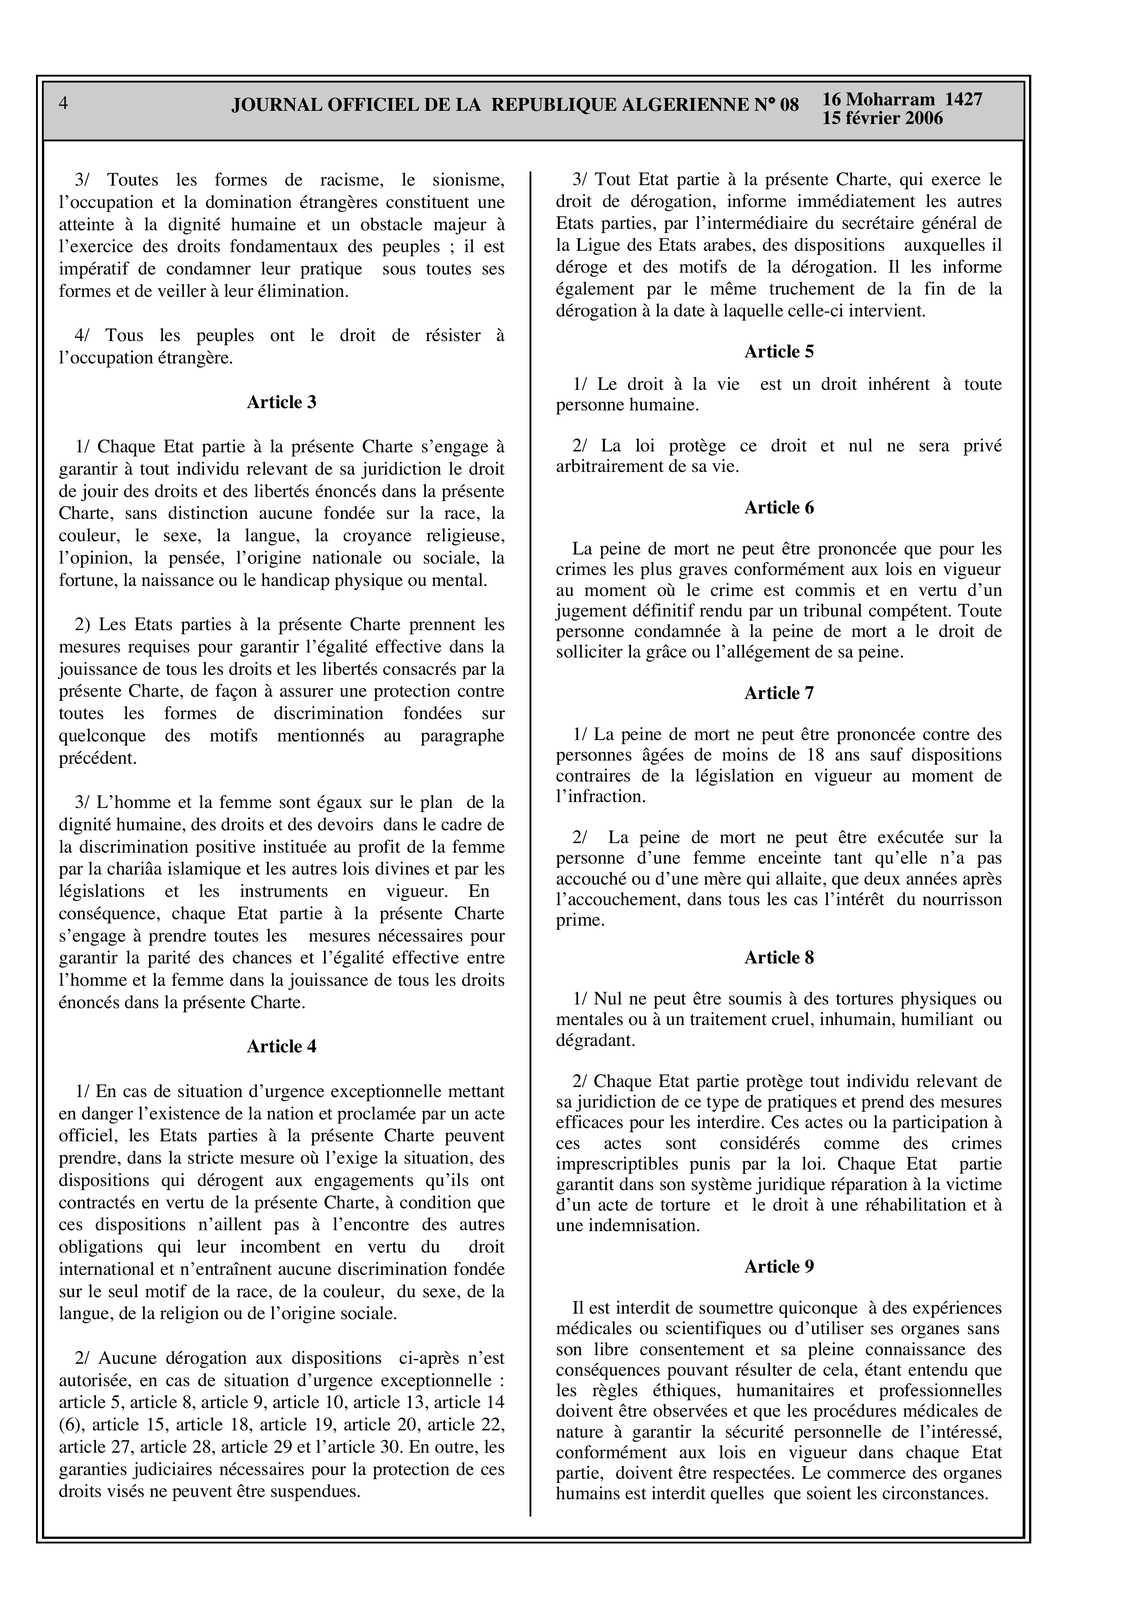

In [14]:
parserImages.images[3]

In [12]:
%%time
parserImages.crop_all_images(top=140, left=50, right=100, bottom=80)

CPU times: user 13.3 ms, sys: 30.3 ms, total: 43.5 ms
Wall time: 42.6 ms


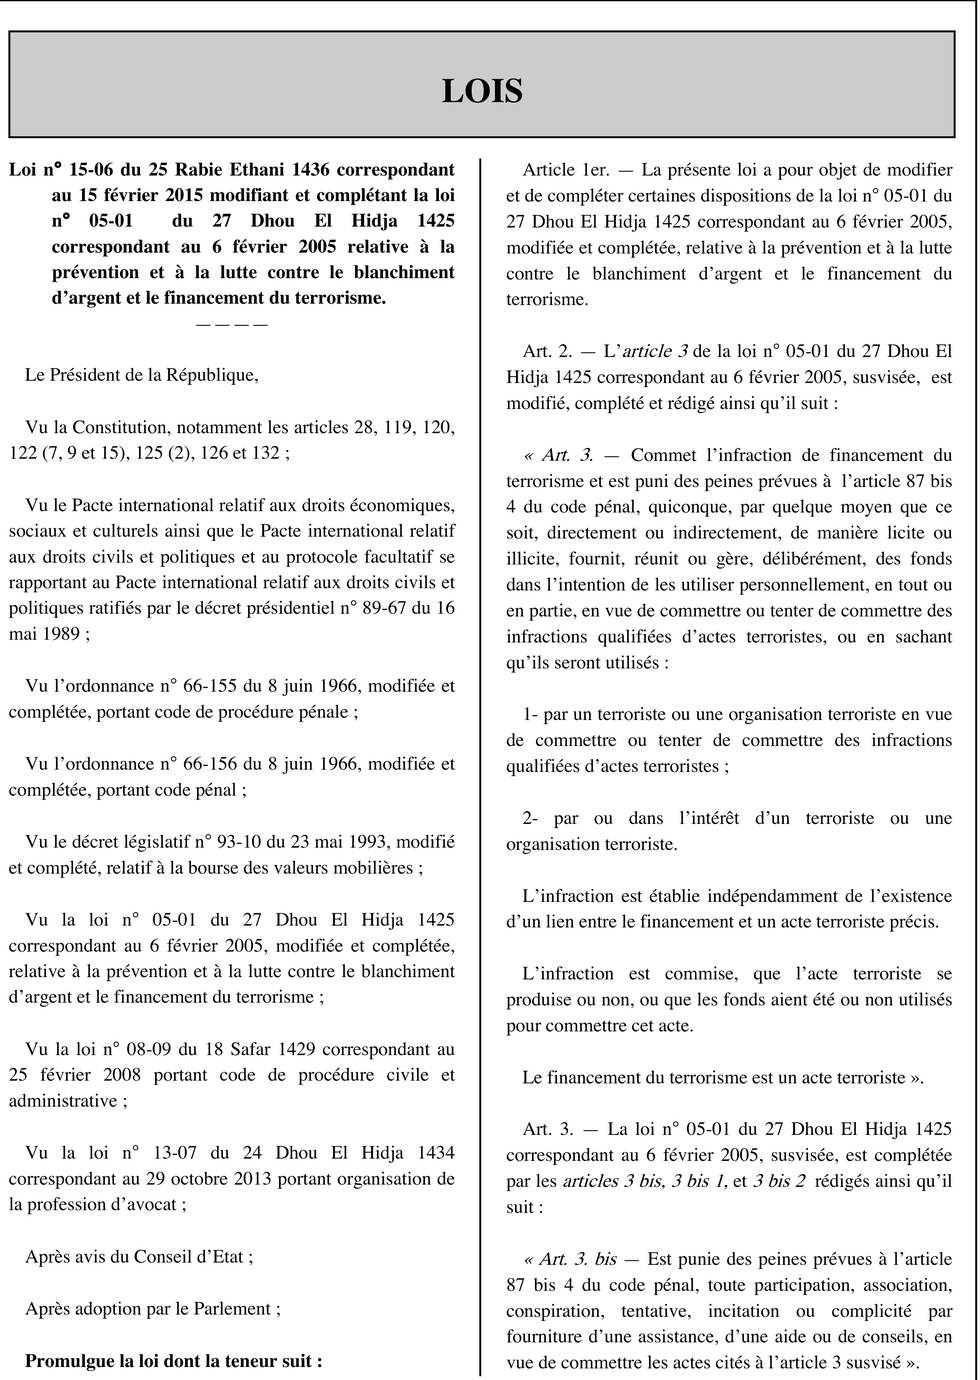

In [13]:
parserImages.images[3]

In [5]:
%%time
parserImages.adjust_all_images_rotations()

CPU times: user 10.8 s, sys: 41.4 ms, total: 10.9 s
Wall time: 49.6 s


In [ ]:
%%time
parserImages.adjust_all_images_rotations_parallel()

In [7]:
data = parserImages.parse_images_to_text_structure()

Recognizing Text: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:48<00:00, 56.15s/it]


In [8]:
with open('convert.json', 'w') as convert_file: 
     convert_file.write(json.dumps(data))

In [11]:
ocr.is_vertical_orientation_correct(parserImages.images[22], debug=False)

False

In [55]:
layouts = ocr.run_layout_order_detection(parserImages.images[24])

Recognizing layout: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.34s/it]


In [21]:
from PIL import Image
def rotate_image_90_degrees(image: Image, clockwise: bool = False) -> Image:
        """
        Rotate an image by 90 degrees while adjusting the height and width.

        Args:
            image (PIL.Image.Image): The image to rotate.
            clockwise (bool): Rotate clockwise if True, otherwise counterclockwise.

        Returns:
            PIL.Image.Image: The rotated image.
        """
        # Rotate the image
        if clockwise:
            rotated_image = image.transpose(Image.Transpose.ROTATE_270)
        else:
            rotated_image = image.transpose(Image.Transpose.ROTATE_90)
        
        return rotated_image

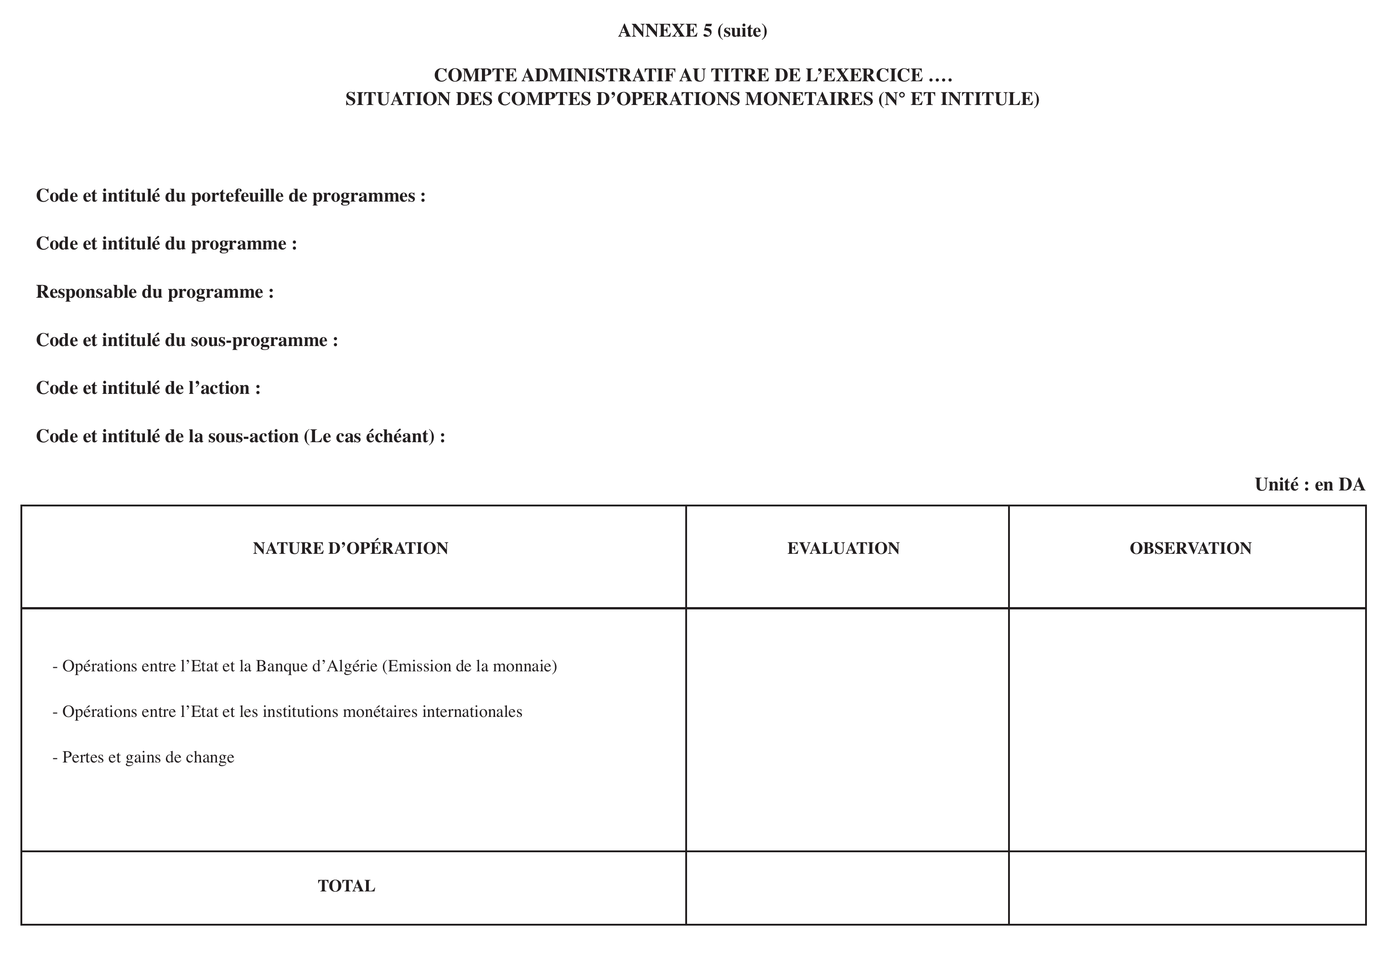

In [22]:
rotate_image_90_degrees(parserImages.images[22])

In [8]:
## detected_textes = ocr.run_text_recognition_fr(parserImages.images[6], layouts)

In [56]:
detected_textes = ocr.run_ocr_separate_text_recognition_fr(parserImages.images[24])

Recognizing Text: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [04:00<00:00, 60.13s/it]


In [60]:
imageTest = ImageBuilder(image=parserImages.images[24], layout_data=layouts, text_data=detected_textes)

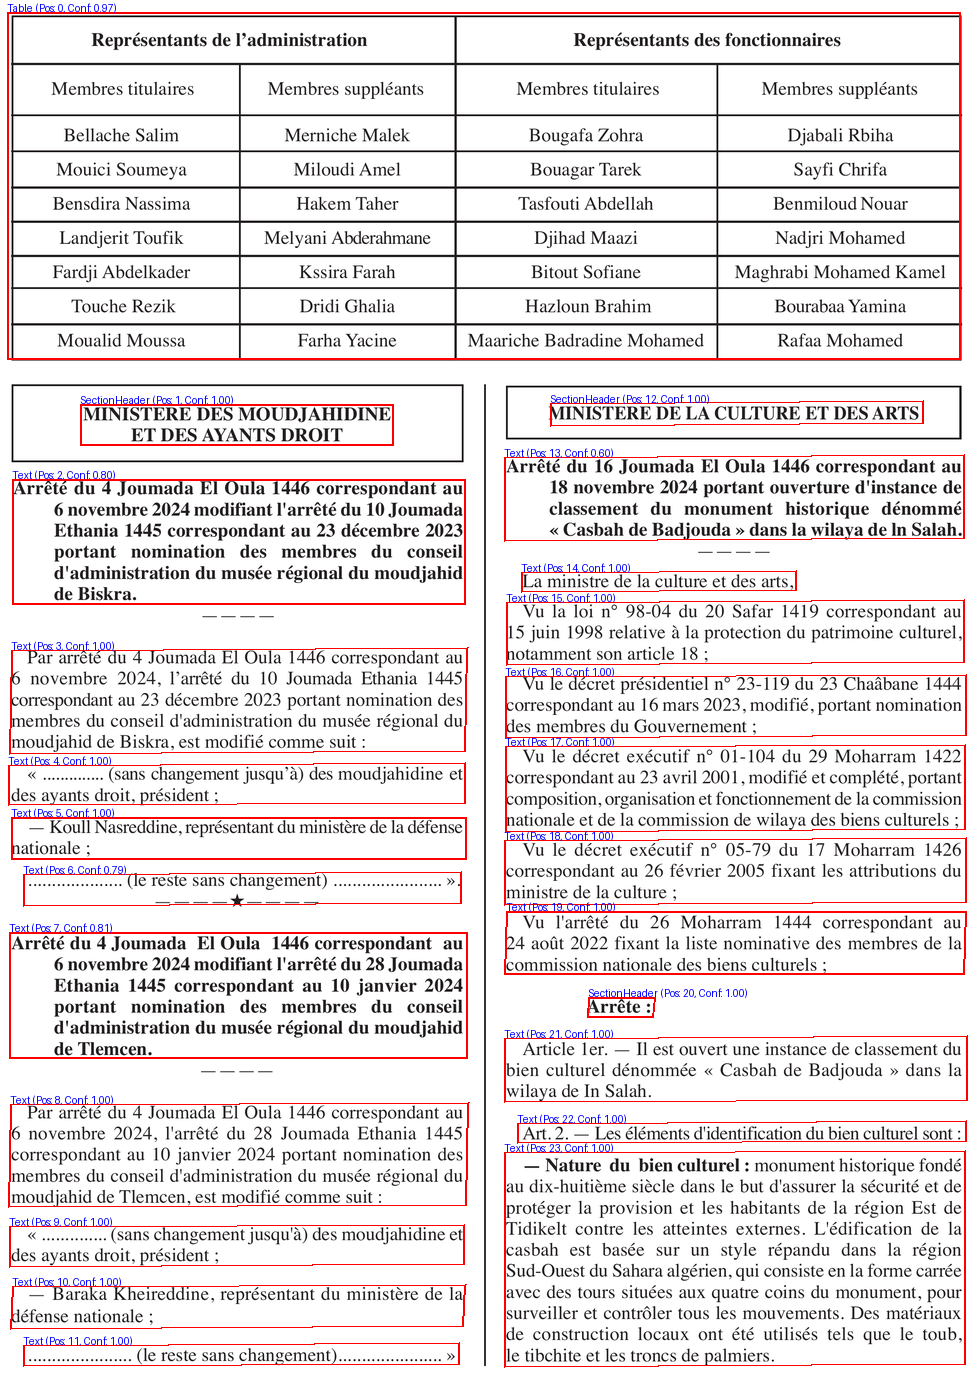

In [61]:
imageTest.draw_order_layout_on_image()

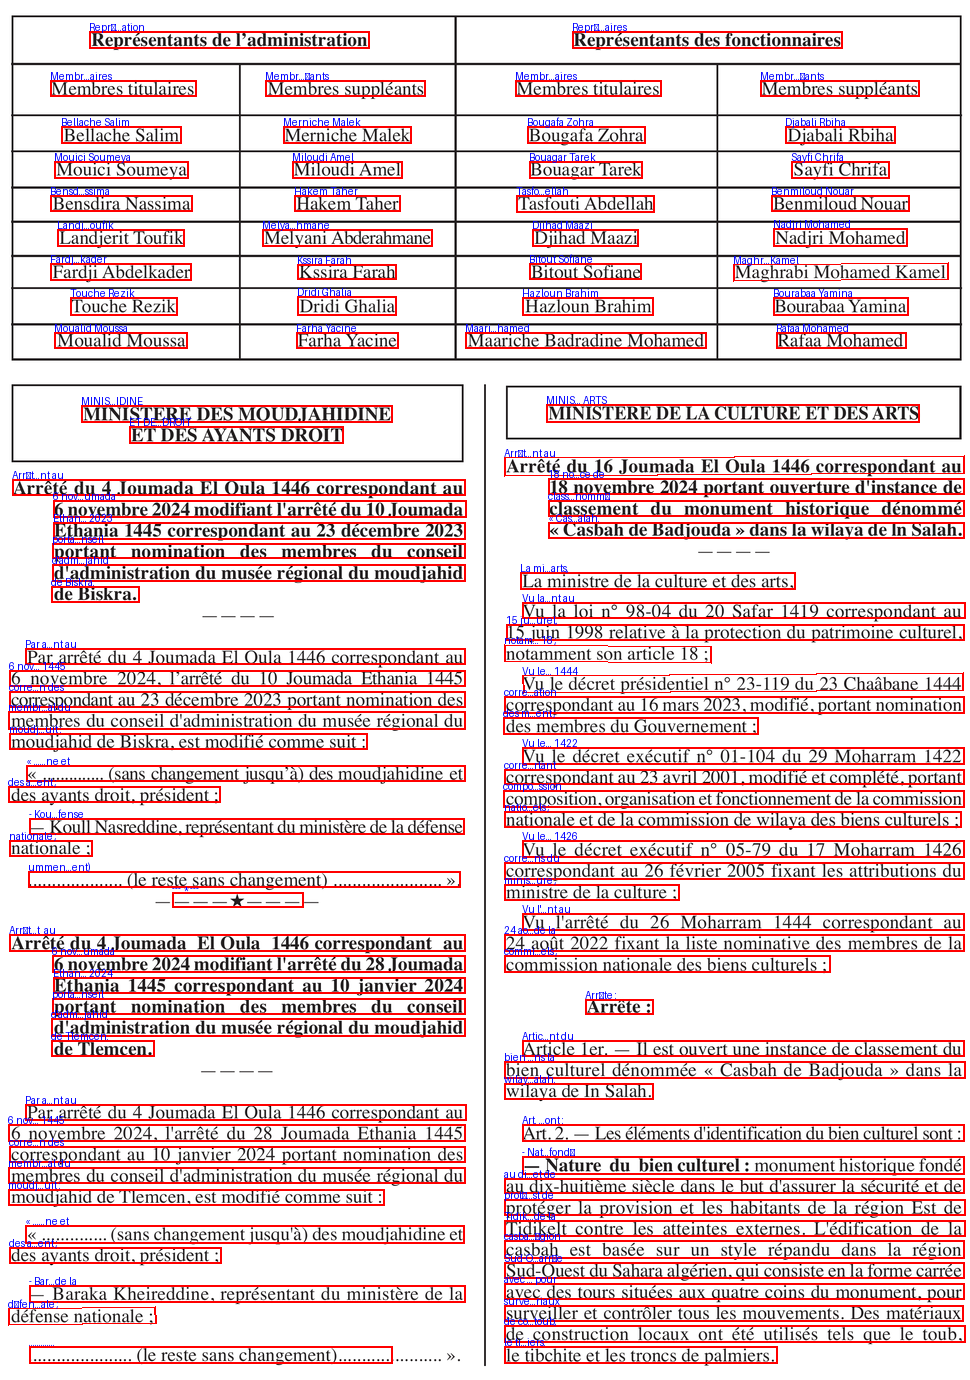

In [62]:
imageTest.draw_text_on_image()

Recognizing Text: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:21<00:00, 50.39s/it]


In [10]:
imageTest = ImageBuilder(image=parserImages.images[6], layout_data=layouts, text_data=detected_textes)

In [63]:
res = imageTest.match_making_texts_to_layouts(margin=15)

In [64]:
res 

[{'bbox_text': [[89.0, 31.0, 369.0, 48.0],
   [572.0, 31.0, 842.0, 48.0],
   [50.0, 80.0, 196.0, 96.0],
   [265.0, 80.0, 425.0, 96.0],
   [515.0, 80.0, 661.0, 96.0],
   [760.0, 80.0, 919.0, 96.0],
   [61.0, 126.0, 181.0, 143.0],
   [283.0, 126.0, 411.0, 143.0],
   [527.0, 126.0, 645.0, 143.0],
   [785.0, 126.0, 895.0, 143.0],
   [54.0, 161.0, 188.0, 178.0],
   [292.0, 161.0, 402.0, 178.0],
   [529.0, 161.0, 642.0, 178.0],
   [791.0, 161.0, 889.0, 178.0],
   [50.0, 195.0, 192.0, 211.0],
   [294.0, 195.0, 400.0, 211.0],
   [516.0, 195.0, 654.0, 212.0],
   [771.0, 195.0, 909.0, 211.0],
   [773.0, 228.0, 907.0, 246.0],
   [57.0, 229.0, 184.0, 246.0],
   [262.0, 229.0, 432.0, 246.0],
   [532.0, 229.0, 638.0, 246.0],
   [50.0, 263.0, 191.0, 280.0],
   [529.0, 263.0, 641.0, 279.0],
   [297.0, 264.0, 396.0, 279.0],
   [733.0, 264.0, 948.0, 279.0],
   [297.0, 296.0, 396.0, 315.0],
   [70.0, 297.0, 177.0, 315.0],
   [522.0, 297.0, 653.0, 315.0],
   [773.0, 297.0, 908.0, 315.0],
   [54.0, 332.0, 

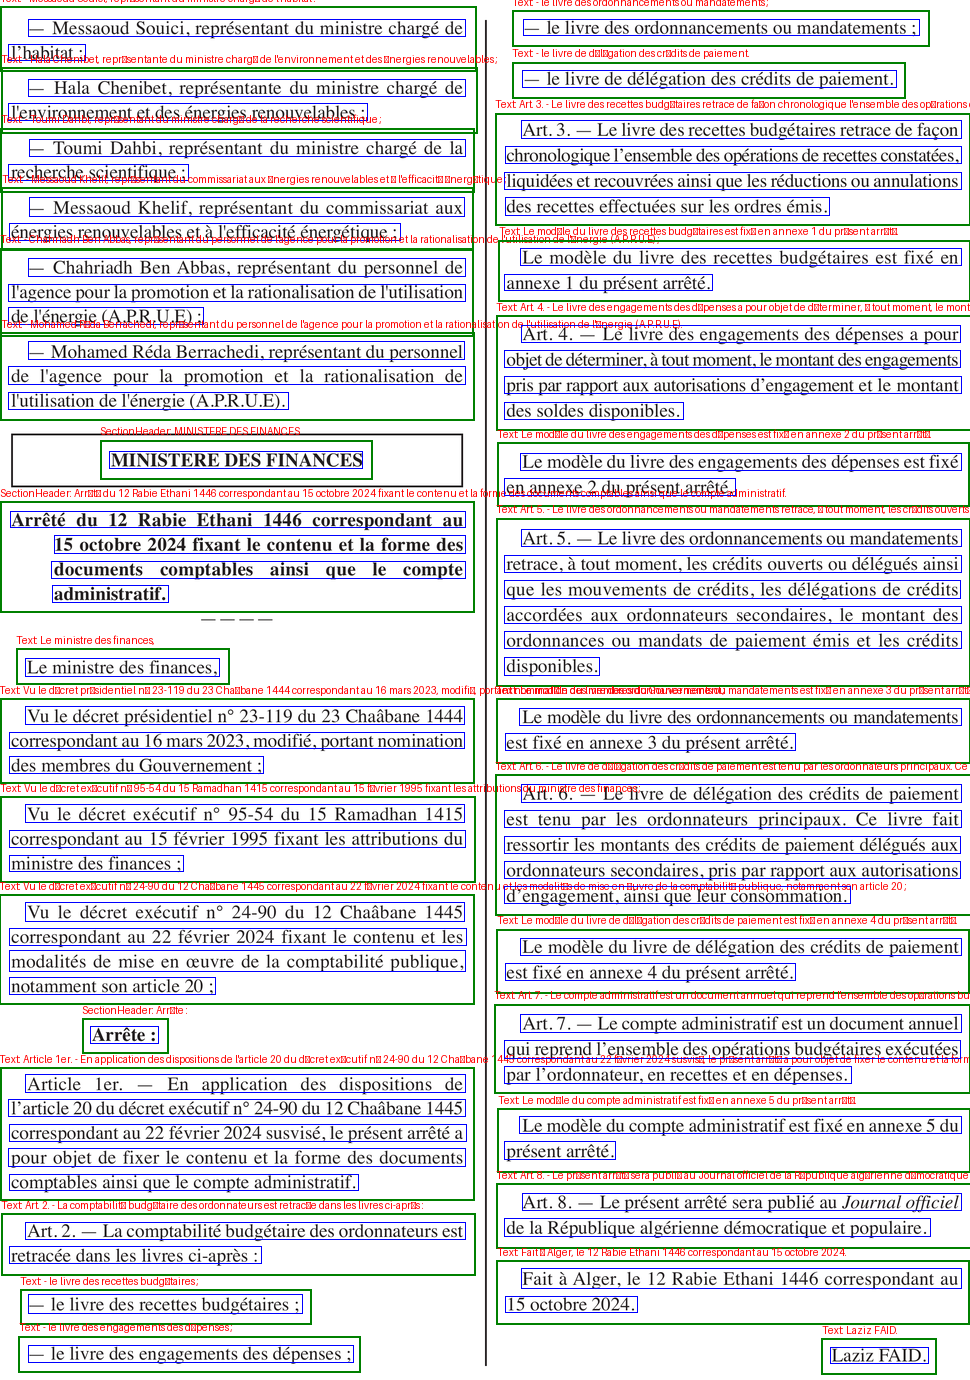

In [23]:
imageTest.visualize_margin_and_layout(margin=10)

In [19]:
import os

def list_files_recursive(directory):
    file_list = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list

# Example usage
directory_path = "./downloads"
all_files = list_files_recursive(directory_path)
for file in all_files:
    # print(file)
    pass

./downloads/1962/F1962001.pdf
./downloads/1962/F1962002.pdf
./downloads/1962/F1962003.pdf
./downloads/1962/F1962004.pdf
./downloads/1962/F1962005.pdf
./downloads/1962/F1962006.pdf
./downloads/1962/F1962007.pdf
./downloads/1962/F1962008.pdf
./downloads/1962/F1962009.pdf
./downloads/1962/F1962010.pdf
./downloads/1962/F1962011.pdf
./downloads/1962/F1962012.pdf
./downloads/1962/F1962013.pdf
./downloads/1962/F1962014.pdf
./downloads/1962/F1962015.pdf
./downloads/1962/F1962016.pdf
./downloads/1962/F1962017.pdf
./downloads/1962/F1962018.pdf
./downloads/1962/F1962019.pdf
./downloads/1962/F1962020.pdf
./downloads/1963/F1963001.pdf
./downloads/1963/F1963002.pdf
./downloads/1963/F1963003.pdf
./downloads/1963/F1963004.pdf
./downloads/1963/F1963005.pdf
./downloads/1963/F1963006.pdf
./downloads/1963/F1963007.pdf
./downloads/1963/F1963008.pdf
./downloads/1963/F1963009.pdf
./downloads/1963/F1963010.pdf
./downloads/1963/F1963011.pdf
./downloads/1963/F1963012.pdf
./downloads/1963/F1963013.pdf
./download

In [20]:
import os
import shutil
from pathlib import Path

def create_yearly_zip_files(base_directory, output_directory):
    """
    Creates a ZIP file for each year folder inside the base directory and saves it in the output directory.

    Args:
        base_directory (str): The path to the base directory containing year folders.
        output_directory (str): The path to the directory where ZIP files will be saved.
    """
    base_path = Path(base_directory)
    output_path = Path(output_directory)

    # Ensure the output directory exists
    output_path.mkdir(parents=True, exist_ok=True)

    # Iterate over year directories in the base directory
    for year_dir in base_path.iterdir():
        if year_dir.is_dir():  # Check if it's a directory
            year = year_dir.name
            zip_file_path = output_path / f"{year}.zip"

            # Create a ZIP file for the year directory
            shutil.make_archive(zip_file_path.with_suffix(""), "zip", year_dir)
            print(f"Created ZIP file: {zip_file_path}")


In [21]:
# Example usage
base_directory = "./downloads"  # Directory containing year folders
output_directory = "./year_zip-files"  # Directory to save ZIP files
create_yearly_zip_files(base_directory, output_directory)

Created ZIP file: year_zip-files/1962.zip
Created ZIP file: year_zip-files/1963.zip
Created ZIP file: year_zip-files/1964.zip
Created ZIP file: year_zip-files/1965.zip
Created ZIP file: year_zip-files/1966.zip
Created ZIP file: year_zip-files/1967.zip
Created ZIP file: year_zip-files/1968.zip
Created ZIP file: year_zip-files/1969.zip
Created ZIP file: year_zip-files/1970.zip
Created ZIP file: year_zip-files/1971.zip
Created ZIP file: year_zip-files/1972.zip
Created ZIP file: year_zip-files/1973.zip
Created ZIP file: year_zip-files/1974.zip
Created ZIP file: year_zip-files/1975.zip
Created ZIP file: year_zip-files/1976.zip
Created ZIP file: year_zip-files/1977.zip
Created ZIP file: year_zip-files/1978.zip
Created ZIP file: year_zip-files/1979.zip
Created ZIP file: year_zip-files/1980.zip
Created ZIP file: year_zip-files/1981.zip
Created ZIP file: year_zip-files/1982.zip
Created ZIP file: year_zip-files/1983.zip
Created ZIP file: year_zip-files/1984.zip
Created ZIP file: year_zip-files/1

In [53]:
yearVisual = '2001'
parseImageTestOne = JoradpFileParse("./downloads/"+ yearVisual + "/F" + yearVisual + "002.pdf")
parseImageTestOne.get_images()
parseImageTestOne.resize_image_to_fit_ocr()
parseImageTestOne.crop_all_images(top=120, left=80, right=80, bottom=100)
parseImageTestOne.adjust_all_images_rotations()


In [1]:
#for i in range(0,len(parseImageTestOne.images)):
    #parseImageTestOne.images[i]